# <center>Lecture 4: Maximum likelihood and logit</center>
## <center>Antoine Chapel (Sciences Po & PSE) </center>
## <center>Alfred Galichon's [math+econ+code](https://www.math-econ-code.org/) prerequisite class on numerical optimization and econometrics, in Python </center>
Class content by Antoine Chapel. Past and present support from Alfred Galichon's ERC grant CoG-866274 is acknowledged, as well as inputs from contributors listed [here](https://www.math-econ-code.org/team). If you reuse material from this class, please cite as:

Antoine Chapel, 'math+econ+code' prerequisite class on numerical optimization and econometrics, January 2023

#### References:

* Discrete Choice Methods with Simulation 2nd Ed, (Train, K) 2009
* Microeconometrics Methods and Applications, (Cameron, Trivedi), 2005
* Alfred Galichon, 'math+econ+code' masterclass on optimal transport and economic applications, January 2022.

## Introduction and Outline

The Math+Econ+Code January masterclass is divided into an optimization-oriented part and an econometrics-oriented part. To understand well how to apply Optimal Transport to econometrics, some econometrics building blocks are absolutely essential, especially Logit theory. We will carefully study this topic to prepare you best.

First, we will discuss a bit of Maximum Likelihood to remind the basics of nonlinear econometrics. In particular, we will consider Poisson regression. Then, we will rederive step-by-step the logit estimation technique.

Across this lecture, we will make use of numerical examples in Python.

### Maximum Likelihood:
Econometrics start with a sample and some distributional assumption.
If you have the following sample: [81, 75, 100, 92, 64], what is the chance that it has been generated by a normal distribution of mean 10: $\mathcal{N}(10, 1)$ ? The chance is very low, actually close to 0. The chance/the **likelihood** that it has been generated by $\mathcal{N}(82, 1)$ is much higher. Maximum likelihood allows us to formalize this idea through an optimization process.


Let us start by finding a normal estimator through Maximum Likelihood, as a first example.

\begin{align}
f(y | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{ (y - \mu)^2 }{2\sigma^2}}
\end{align}

The likelihood function is equal to the joint density of the distribution:

\begin{align}
\mathcal{L} (\mu, \sigma^2 | y) = \prod_{i=1}^N  \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{ (y - \mu)^2 }{2\sigma^2}}
\end{align}

\begin{align}
\mathcal{L} (\mu, \sigma^2 | y) = \Bigg(\frac{1}{\sqrt{2\pi \sigma^2}}\Bigg)^n e^{{-\frac{1}{2 \sigma^2}} \sum_{i=1}^n (y_i - \mu)^2 }
\end{align}

\begin{align}
\log \mathcal{L} = -\frac{n}{2} \log(2\pi\sigma^2) - \frac{1}{2 \sigma^2} \sum_{i=1}^n (y_i - \mu)^2
\end{align}

\begin{align}
 = -\frac{n}{2} \log(2\pi) - \frac{n}{2}\log(\sigma^2)-\frac{1}{2\sigma^2} \sum_{i=1}^n (y_i^2 - 2y_i\mu + \mu^2)
\end{align}

Now, we find the most likely value for $\mu$ by taking FOC.

\begin{align}
\frac{\partial \log \mathcal{L}}{\partial \mu} = -\frac{1}{2 \sigma^2} 2 \sum (\mu - y_i) = \frac{1}{\sigma^2} \sum_{i=1}^n (y_i - \mu) \hspace{2pt} \bigg|_{\hat{\mu}} = 0
\end{align}
\begin{align}
\hat{\mu} = \frac{1}{n} \sum_{i} y_i
\end{align}

Exercise 1: follow the same procedure for variance estimator $\hat{\sigma}^2$

Exercise 2: find the OLS estimator (for simple regression) through maximum likelihood. Hint: the distributional assumption is that $\epsilon_i \sim \mathcal{N}(0, \sigma^2)$, so $y_i \sim \mathcal{N}(\beta_0 + \beta_1 x_1, \sigma^2)$

### Poisson Regression

Here, let us start from the assumption that data is distributed according to the Poisson distribution. This allows us to do Poisson Regression.

PMF of the Poisson distribution: $f(y|\lambda) = \frac{e^{-\lambda} \lambda^y}{y!}$
$E[y] = Var[y] = \lambda$ 

First, what is Poisson regression, and why should we even bother with anything more complicated than OLS ?

When you do OLS, you rely on the assumption that your the endogenous variable is normally distributed. This works fine most of the time, but sometimes this assumption is not realistic. Poisson regression is used to model situations where the endogenous variable is $(i)$ discrete and $(ii)$ positive. The typical example is the number of visits to the doctor that an individual makes per year. A lot of people only go once a year, a bit less go twice a year, very few go more than 6 times a year. Nobody goes -2 times a year. Therefore this process is better approximated by a Poisson distribution than a normal distribution. Although OLS would give some results, the Poisson assumption will give better ones.

An OLS consists in saying that $E[Y|X] = X'\beta$.

**Generalized Linear Models**, of which Poisson regression is a very often used subtype, assumes instead that:

\begin{align}
g(E[Y|X]) &= X'\beta \\
E[Y|X] &= g^{-1}(X'\beta)
\end{align}

Where $g$ is called the **link** function. In OLS, which is also a subtype of GLM, the link function is the identity: $g(x) = x$. In Poisson regression, the link function is the natural logarithm. So, we have:

\begin{align}
E[Y|X] = e^{X'\beta}
\end{align}


Let us go back to the Poisson distribution. The density of the Poisson regression model for one observation is as follows:
\begin{align}
f(y_i|x_i, \beta) = \frac{e^{-\exp(x_i' \beta)} \exp(x_i' \beta)^{y_i}}{y_i!}
\end{align}

If the observations are i.i.d, we can derive the joint density of a sample of size $N$ as:

\begin{align}
\mathcal{L} = \prod_{i=1}^N \frac{e^{-\exp(x_i' \beta)} \exp(x_i' \beta)^{y_i}}{y_i!}
\end{align}

This is the **likelihood** ($\mathcal{L}$) function, on which we want to maximize for the optimal parameter (here, $\beta$). Since a sum is always much easier to take derivative on than products, it is better to take the **log-likelihood**:
\begin{align}
\log \mathcal{L} = \frac{1}{N}\sum_{i=1}^N \log\Big(\frac{e^{-\exp(x_i' \beta)} \exp(x_i' \beta)^{y_i}}{y_i!}\Big) = \frac{1}{N} \sum_{i=1}^N -\exp(x_i' \beta) + y_i x_i' \beta - \log y_i !
\end{align}

\begin{align}
\frac{\partial \log\mathcal{L}}{\partial \beta} = \frac{1}{N} \sum_{i=1}^N (y_i - \exp(x_i'\beta))x_i' = 0
\end{align}

Given that this equation has no closed form solution, we need to rely on numerical optimization methods, such as the ones provided by Scikit learn.

In [1]:
import numpy as np
from sklearn import linear_model
Poisson_reg = linear_model.PoissonRegressor()
X_val = np.array([[1, 2], [2, 3], [3, 5], [4, 3]])
y_val = np.array([12, 17, 22, 21])

In [2]:
Poisson_reg.fit(X_val, y_val)
Poisson_reg.score(X_val, y_val)

0.9716538991248989

In [3]:
Poisson_reg.coef_

array([0.13488995, 0.09463608])

DIY approach: let's recycle our lecture on numerical optimisation: we want to find $\hat{\beta} = \arg \max_\beta \log \mathcal{L}(X, y; \beta)$

In [4]:
from scipy.optimize import minimize

In [5]:
#Since we are doing things by hand, let's add a column of ones to account for a constant
X_val = np.concatenate((np.ones((X_val.shape[0], 1)), X_val), axis=1)
X_val

array([[1., 1., 2.],
       [1., 2., 3.],
       [1., 3., 5.],
       [1., 4., 3.]])

In [6]:
def logL_Poisson(β, X, y):
    sum_logl = 0
    for i, x_i in enumerate(X):
        y_i = y[i]
        sum_logl += -np.exp(x_i @ β) + y_i*(x_i @ β) #- np.log(float(factorial(y_i)))
    nobs = X.shape[0]  
    return -(sum_logl/nobs)

#Why '-' ? The scipy optimisation function is written explicitly for minimization. Therefore,
#we will minimize (-likelihood), which is equivalent as maximising the likelihood.

In [7]:
#Option 1: half-DIY
minimize(logL_Poisson, x0 = np.array([0, 0, 0]), args=(X_val, y_val))

      fun: 2.3679256828901867
 hess_inv: array([[ 0.69516226, -0.08215793, -0.12018918],
       [-0.08215793,  0.0582273 , -0.02220999],
       [-0.12018918, -0.02220999,  0.05237436]])
      jac: array([5.36441803e-07, 1.25169754e-06, 2.68220901e-06])
  message: 'Optimization terminated successfully.'
     nfev: 70
      nit: 10
     njev: 14
   status: 0
  success: True
        x: array([2.19900236, 0.14059106, 0.09672536])

We nearly get the same coefficients as the sklearn function (the first value is a constant, and the two next, 0.14 and 0.09 are the weights for our two variables)

Overall, we can model $\hat{y} = e^{2.2 + 0.14 X_1 + 0.09 X_2}$

In [8]:
#Let's adapt a bit our functions from yesterday to fit them to maximum likelihood
#Option 2: full-DIY

def num_gradient(f, x, X, y):
    partial_derivatives_vector=np.empty(x.shape[0])
    for index in range(x.shape[0]):
        e_ind = np.zeros(x.shape[0])
        e_ind[index] = 1.0
        h = 1e-5
        partial_derivatives_vector[index] = (f(x + e_ind*h, X, y) - f(x - e_ind*h, X, y))/(2*h)
    return partial_derivatives_vector

def num_hessian(f, x, X, y):
    hessian = np.empty((x.shape[0], x.shape[0]))
    for index in range(x.shape[0]):
          for jindex in range(x.shape[0]):
                e_ind = np.zeros(x.shape[0])
                e_ind[jindex] = 1.0
                h = 1e-5
                hessian[index, jindex] = (num_gradient(f, x + e_ind*h, X, y)[index] - num_gradient(f, x - e_ind*h, X, y)[index])/(2*h)
    return hessian

def gradient_descent(f, x_1, X, y, step=1, tol=1e-5, verbose=False):
    """Implements Gradient Descent using the Newton-Raphson algorithm. Gradients and Hessians are computed numerically.\n
    x_1: starting point of the iterative process\n
    X: Explanatory variables\n
    y: Dependent variable"""
    
    
    error = 1e6
    x_hist = []
    maxiter=100
    
    x = x_1
    n_iter=1
    
    while error > tol:
        g_k = num_gradient(f, x, X, y)
        if verbose==True:
            print(f'iteration: {n_iter}, θ_hat: {np.round(x, 3)}, gradient: {np.round(g_k, 3)}, likelihood: {np.round(f(x, X,y), 3)}')
        
        H_k = num_hessian(f, x, X, y)
        try:
            A_k = -np.linalg.inv(H_k)
        except:
            A_k = np.random.normal(0, 1, size=x.shape[0])*np.identity(x.shape[0])
            print("ERROR: Failure to invert the Hessian")
            
        x = x + step*A_k@g_k
        x_hist.append(x)
        error = max(abs(g_k))
        n_iter+=1
    return x, x_hist

In [9]:
beta_hat, beta_hist = gradient_descent(logL_Poisson, np.zeros(3), X_val, y_val, verbose=True)

iteration: 1, θ_hat: [0. 0. 0.], gradient: [-17.   -46.5  -58.75], likelihood: 37.836
iteration: 2, θ_hat: [5.572 2.343 1.714], gradient: [5.24665615e+08 1.70488523e+09 2.35652622e+09], likelihood: 524665348.706
iteration: 3, θ_hat: [4.572 2.343 1.714], gradient: [1.93013663e+08 6.27192079e+08 8.66917633e+08], likelihood: 193013414.686
iteration: 4, θ_hat: [3.57  2.343 1.714], gradient: [7.10057051e+07 2.30731052e+08 3.18921176e+08], likelihood: 71005474.532
iteration: 5, θ_hat: [2.59  2.34  1.713], gradient: [2.61217057e+07 8.48812038e+07 1.17324535e+08], likelihood: 26121493.145
iteration: 6, θ_hat: [1.604 2.337 1.711], gradient: [ 9609675.502 31226033.824 43161269.932], likelihood: 9609480.857
iteration: 7, θ_hat: [0.623 2.333 1.709], gradient: [ 3535219.42  11487404.75  15878130.722], likelihood: 3535042.707
iteration: 8, θ_hat: [-0.38   2.334  1.71 ], gradient: [1300528.574 4225975.42  5841220.758], likelihood: 1300369.872
iteration: 9, θ_hat: [-1.377  2.334  1.71 ], gradient: [ 4

In [10]:
beta_hat

array([2.19900227, 0.1405911 , 0.09672535])

## Logit

Logit is a tool at the basis of discrete choice models. We live in a discrete world: when you choose a level of insurance or an airplane ticket, you choose between basic, premium, elite, or whatever the name is. If you want to go from Paris to London, you need to choose between airplane, train, boat, car or swimming. What drives your choice ? Probably comfort, speed, and price, among others.

As you may know already, OLS is unfit for modelling this type of process. Let us say that you can only choose between plane ($y_i = 1$) or train ($y_i = 0$). For any explanatory variable $x$, we are looking for the probability P($y_i = 1 | x$). OLS doesn't know that we are looking for a probability, so it may give probability $>$ 1 or $< 0$, which doesn't make sense. For this reason the logit framework is more appropriated than OLS.

Logit relies on an important concept which is unobserved heterogeneity: it can be understood as the "things" that make a given alternative more or less desirable, but that we cannot observe it in the data. For example, if you study the market for chairs, it may be easy to observe the material used, but much less easy to observe the level of comfort.

For logit, the distributional assumption of this unobserved heterogeneity is that it is distributed following the Gumbel distribution. It is also called Extreme Value Type 1.

The CDF of this distribution is the following: $F(\epsilon) = e^{-e^{-\epsilon}}$

In [2]:
import numpy as np
import seaborn as sns

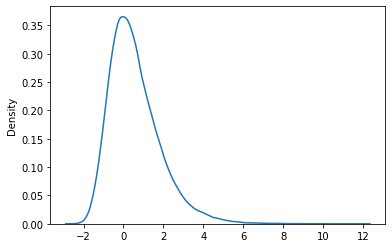

In [3]:
X = np.random.gumbel(size=100000)
sns.kdeplot(X, label="Standard Gumbel Distribution", bw_adjust=1)

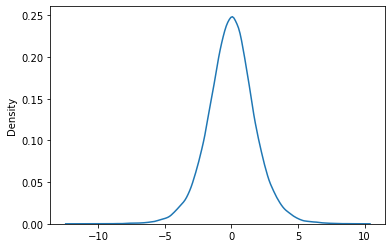

In [12]:
Y = np.random.gumbel(size=100000)
Z = X-Y

sns.kdeplot(Z, label="Logistic Distribution", bw_adjust=1)

## Multinomial Logit

An agent $i$ chooses among alternatives $j \in \mathcal{J}$. The utility derived by this agent from choosing alternative $j$ is written as follows:

\begin{align}
U_{ij} = V_{ij} + \epsilon_{ij}, \hspace{5pt} \forall j
\end{align}

Where V is deterministic, a function of product characteristics (like $V$ = $X'\beta$), and $\epsilon$ is the unobserved heterogeneity.

The probability that this agent chooses $j$ rather than $k$ given $\epsilon_{ij}$ is thus:

\begin{align}
P(U_{ik} < U_{ij} | \epsilon_{ij} \hspace{5pt} \forall k \neq j) \\
= P(V_{ik} + \epsilon_{ik} < V_{ij} + \epsilon_{ij} \hspace{5pt} \forall k \neq j) \\
= P(\epsilon_{ik} < \epsilon_{ij} + V_{ij} - V_{ik} \hspace{5pt} \forall k \neq j)
\end{align}

\begin{align}
 = F(\epsilon_{ij} + V_{ij} - V_{ik} \hspace{5pt} \forall k \neq j) = \prod_{k \neq j}e^{-e^{-{\epsilon_{ij} + V_{ij} - V_{ik}}}}
\end{align}

The next step are very algebraic, and you only need to know and be able to use the result. But it is good to rederive the results once in your life. 
Since we do not know $\epsilon_{ij}$ so we need to integrate over possible values.

\begin{align}
P_{ij} = \int_{-\infty}^{+\infty} \prod_{k \neq j} e^{-e^{-{\epsilon_{ij} + V_{ij} - V_{ik}}}} f(\epsilon_{ij}) d \epsilon_{ij}
\end{align}
We know that: 
\begin{align}
f(\epsilon_{ij}) = e^{-\epsilon} e^{-e^{-\epsilon}}
\end{align}

\begin{align}
P_{ij} = \int_{-\infty}^{+\infty} \Bigg(\prod_{k} e^{-e^{-{\epsilon_{ij} + V_{ij} - V_{ik}}}}\Bigg) e^{-\epsilon_{ij}} d \epsilon_{ij} \\
= \int_{-\infty}^{+\infty} exp\Bigg( \sum_k e^{-(\epsilon_{ij} + V_{ij} - V_{ik})} \Bigg) e^{-\epsilon_{ij}} d\epsilon_{ij} \\
= \int_{-\infty}^{+\infty} exp\Bigg( -e^{-\epsilon_{ij}} \sum_k e^{-(V_{ij} - V_{ik})} \Bigg) e^{-\epsilon_{ij}} d\epsilon_{ij} 
\end{align}

Notational trick: we define $t = e^{-\epsilon_{ij}}$: $\hspace{5pt}$ $\frac{dt}{d\epsilon_{ij}} = -e^{-\epsilon_{ij}}$, so $dt = -e^{-\epsilon_{ij}}d\epsilon_{ij}$

We rewrite this integral as being integrated over $dt$, noting that, when $\epsilon$ tended towards $+\infty$, t would tend to 0, and when $\epsilon$ tended towards $-\infty$, $t$ tended towards $\infty$.

\begin{align}
P_{ij} = \int_{+\infty}^0 exp \Bigg( -t \sum_k e^{-(V_{ij} - V{ik})} \Bigg) (-dt) \\
=  \int_{0}^{+\infty} exp \Bigg( -t \sum_k e^{-(V_{ij} - V_{ik})} \Bigg) dt
\end{align}

This expression is then relatively easy to integrate since it's based on an exponential:

\begin{align}
= \Bigg[ \frac{exp \Big( -t \sum_k e^{-(V_{ij} - V_{ik})} \Big)}{-\sum_k e^{-(V_{ij} - V_{ik})} } \Bigg]_0^{+\infty} \\
= \frac{1}{\sum_k e^{-(V_{ij} - V_{ik})}} \\
= \frac{e^{V_{ij}}}{\sum_k e^{V_{ik}}}
\end{align}


This really succint closed-form expression, which is allowed by the distributional assumption made on the vector of $\epsilon$, allows us to transform observable characteristics into choice probabilities. Based on "what we can observe" about alternative $j$, we can express the probability that an individual will choose it. How to go now from this to a regression allowing us to estimate parameters ?

Let us normalize the utility of alternative $j=0$ to $V_0 = 0$, and forget about the individual subscript for now. We can do so by interpreting $P_{j}$ as the "market share" of alternative $j$, which we denote $s_j$. These market shares are usually easily observed from the data. We will typically make the assumption that $V_j$ is linear in characteristics of $j$: $V_j = X_j'\theta + \xi_j$, where $\xi_j$ is a normally distributed error term. The question is now, how can we estimate $\theta$ ?

\begin{align}
s_j = \frac{e^{V_j}}{\sum_k e^{V_k}} \\
s_0 = \frac{e^{V_0}}{\sum_k e^{V_k}}
\end{align}

\begin{align}
\frac{s_j}{s_0} &= \frac{e^{V_j}}{e^{V_0}} = \frac{e^{V_j}}{e^0} = e^{V_j} \\
\log(s_j) - \log(s_0) &= V_j \\
\log(s_j) - \log(s_0) &= X_j'\theta + \xi_j
\end{align}

This last expression is just an OLS regression equation, that you can estimate for every alternative $j$. This model is relatively simple. In the field of empirical Industrial Organization, more subtle methods have been employed, one of which we will study tomorrow and in the masterclass (Berry Levinsohn Pakes).

Question: in IO (industrial organization), the price of alternative $j$ is often considered as one of the characteristics of alternative $j$ employed in the regression. On the left-hand-side of the regression equation: a product's market share, and on the r.h.s, the product's price. What issue can arise there ? How would you solve it ?

## Multinomial logit as Poisson regression

The unexpected connection, that will come back in the masterclass. We make a very simple introduction to the topic using the same dataset as the one used in the masterclass.

In [13]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize

In [14]:
thepath = 'https://raw.githubusercontent.com/math-econ-code/mec_optim_2021-01/master/data_mec_optim/demand_travelmode/'
df =  pd.read_csv(thepath+'travelmodedata.csv')
df['choice'] = df['choice'].map({"no": 0, "yes": 1}).to_numpy()

In [15]:
#I: nb of individuals (210)
I = max(df['individual'])

In [16]:
#J: number of alternatives (4)
J = len(set(df['mode']))

In [17]:
#K: nb of characteristics (3: travel, income, gcost)
K = 3

In [18]:
covariates = df[['travel', 'income', 'gcost']].to_numpy()

The three variables of interest are "travel, -(travel*income), -gcost". We create an array $X_{ij}$ that contains these. Then, we normalize the data.

In [19]:
X_ij = np.empty(covariates.shape)
X_ij[:, 0] = covariates[:, 0]
X_ij[:, 1] = -(covariates[:, 0]*covariates[:, 1])
X_ij[:, 2] = -(covariates[:, 2])

X_mean = X_ij.mean(axis=0)
X_std = X_ij.std(axis=0, ddof=1) #(ddof=1 is an option that computes the unbiased estimator of variance)

X_ij_n = (X_ij - X_mean)/X_std
X_ij_n

array([[-1.28107292,  0.86778229,  0.85204596],
       [-0.37873479,  0.25143482,  0.83120323],
       [-0.22945091,  0.14946557,  0.85204596],
       ...,
       [ 0.60985625, -1.94203704, -0.94042907],
       [ 0.58995173, -1.91484524, -0.48188895],
       [ 0.1785917 , -1.35288138,  0.35182037]])

What does this array contain ? $(4*210) \times 3$ observations, corresponding to the perception of 210 individuals of 4 means of transport, along three variables. Below, we get a vector of size $210$ that contains the eventual choice of every individual.

In [20]:
choice_data = df['choice'].to_numpy().reshape(I, J)
choice_data

array([[0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0,

Now that representative utility is indexed by individual, we can no more rely on the formulas used earlier, at least not immediately. Check that you see why. So, let's derive multinomial logit like a maximum likelihood:

\begin{align}
P_{ij}|\theta &= \frac{e^{X_{ij}'\theta}}{\sum_k e^{X_{ik}'\theta}}\\
\mathcal{L}(\theta) &= \prod_{i=1}^I \Big(\frac{e^{X_{ij}'\theta}}{\sum_k e^{X_{ik}'\theta}} \Big)\\
\log \mathcal{L}(\theta) &= \frac{1}{N} \sum_{i=1}^N \log \Big(P_{ij}|\theta \Big)
\end{align}

Note that $\frac{1}{N}$ is added to avoid the sum to go to $+\infty$.

\begin{align}
\hat{\theta} = \arg \max_\theta \log \mathcal{L}(\theta)
\end{align}

Let us put this in word: for every individual $i$ , we know $X_{ij}$ and the eventual choice, which we denote $\mu_{ij}$. Given a candidate parameter $\theta$, we can predict a choice probability $P_{ij} | \theta$, which is the **likelihood** of $i$ having this probability to make the observed choice. To find the right set of parameters, we want to maximize this likelihood.

In [21]:
# Standard multinomial logit
def log_l_logit(θ):
    logl = 0
    U = (X_ij_n @ θ).reshape(I, J) #entry (i, j) contains the utility of individual i to choose alternative j
    
    for i in range(I):
        choice_index = np.where(choice_data[i, :] == 1)
        U_i = U[i, :]
        P_ij = np.exp(U_i[choice_index])/(np.sum(np.exp(U_i)))
        
        logl = logl + np.log(P_ij)
    
    #we return -logl rather than logl because the standard optim package does minimization
    return -logl

In [22]:
θ_hat = minimize(log_l_logit, x0=np.zeros(K)).x
θ_hat

array([0.18624277, 0.46897839, 0.5505769 ])

Now, note the following:
This is the expression for logit log-likelihood.

\begin{align}
\log \mathcal{L}(\theta) &= \frac{1}{N} \sum_{i=1}^N \log \Big(\frac{e^{x_{ij}'\theta}}{\sum_k e^{x_{ik}'\theta}}\Big) \\
\end{align}

We rewrite it by summing over alternatives. This is actually a way to write that is more formally correct. Let us denote $\mu_{ij}$ the choice of individual $i$, where $\mu_{ij} = 1$ if $i$ chose $j$, and $\mu_{ij} = 0$ if $i$ didn't choose $j$.

\begin{align}
\log \mathcal{L}(\theta) &= \frac{1}{N} \sum_{i=1}^N \sum_{j=1}^J \mu_{ij} \log \Big(\frac{e^{x_{ij}'\theta}}{\sum_k e^{x_{ik}'\theta}}\Big) \\
&= \frac{1}{N} \sum_{i=1}^N \sum_{j=1}^J \Big( \mu_{ij} \exp({x_{ij}'\theta}) - \mu_{ij}\log \sum_k e^{x_{ik}'\theta}\Big)
\end{align}

Now, let us come back to Poisson regression: this was our initial expression for Poisson likelihood.

\begin{align}
\log \mathcal{L}(\theta) = \frac{1}{N}\sum_{i=1}^N \log\Big(\frac{e^{-\exp(x_i' \theta)} \exp(x_i' \theta)^{y_i}}{y_i!}\Big)
\end{align}

Let us rewrite it with individual fixed effect $\phi_i$. Also, the $y_i$ was our endogenous variable in the simple case. here the endogenous variable is $\mu_i$, and we would like to predict $\mu_{ij}$. So let us add a sum over alternatives: 

\begin{align}
\log \mathcal{L}(\theta) &= \frac{1}{N}\sum_{i=1}^N \sum_{j=1}^J \log\Big(\frac{e^{-\exp( \phi_i + x_{ij}' \theta)} \exp(\phi_i + x_{ij}'\theta)^{\mu_{ij}}}{\mu_{ij}!}\Big) \\
 &= \frac{1}{N}\sum_{i=1}^N \sum_{j=1}^J \Big(-\exp(\phi_i + x_{ij}'\theta) + \mu_{ij}(\phi_i + x_{ij}'\theta) - log(\mu_{ij}!) \Big) \\
 &= \frac{1}{N}\sum_{i=1}^N \sum_{j=1}^J \Big(-\exp(\phi_i + x_{ij}'\theta) + \mu_{ij}(\phi_i + x_{ij}'\theta) \Big)
\end{align}

As we will see, maximizing this expression yields the same estimator as doing maximum likelihood in the logit case. One last technicality: how to add fixed effects (fe) to a Poisson Regression ? Think of an individual fe as an individual-specific intercept. If we want to add a constant for everyone, we just add a vector of ones to the data, like we did with the Poisson regression earlier. Now, we are separating between every individual, so instead of a vector, we add a matrix that would look like this for 3 individuals, 2 alternatives:

\begin{bmatrix}
1 & 0 & 0 \\ 
1 & 0 & 0 \\ 
0 & 1 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
0 & 0 & 1 \\
\end{bmatrix}

Such matrices are built through the kronecker product $\otimes$. If you are not familiar with this, check that you [understand it](https://en.wikipedia.org/wiki/Kronecker_product) before attending the masterclass. The matrix above could be build the following way:


\begin{align}
\mathcal{I}_3 \otimes \mathcal{1}_2 = 
\begin{bmatrix}
1 & 0 & 0 \\ 
0 & 1 & 0 \\
0 & 0 & 1 
\end{bmatrix} \otimes \begin{bmatrix} 1 \\ 1 \end{bmatrix} = \begin{bmatrix}
1 & 0 & 0 \\ 
1 & 0 & 0 \\ 
0 & 1 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
0 & 0 & 1 \\
\end{bmatrix}
\end{align}

In [23]:
fe_matrix = np.kron(np.identity(I), np.ones((J, 1)))
fe_matrix

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [24]:
X_ij_fe = np.concatenate((X_ij_n, fe_matrix), axis=1)

#Our data is now ready for Poisson regression with fixed effects:
pd.DataFrame(X_ij_fe)

,0,1,2,3,4,5,6,7,8,9,...,203,204,205,206,207,208,209,210,211,212
0,-1.281073,0.867782,0.852046,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.378735,0.251435,0.831203,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.229451,0.149466,0.852046,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.015679,0.686504,1.685755,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.387230,0.962306,0.893731,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,0.079069,0.434008,0.601933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
836,-1.148376,0.459905,0.497720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
837,0.609856,-1.942037,-0.940429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
838,0.589952,-1.914845,-0.481889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [25]:
μ_vec = df['choice'].to_numpy()
#due to the fe, our gradient descent function risks taking ages to find a solution because the Newton-Raphson algorithm
#requires computing the Hessian at every iteration. Since it would take too long, we rely on the one provided by sklearn


#This may take a while. For a (much) faster implementation, try to use the PoissonRegressor provided by sklearn.
θ_hat_poisson = minimize(logL_Poisson, x0 = np.random.normal(0, 1, size=213), args=(X_ij_fe, μ_vec)).x[:K]

Check the Poisson Regression tool provided by sklearn [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.PoissonRegressor.html)

In [26]:
print(f'θ_hat obtained through logit: {θ_hat}')
print(f'θ_hat obtained through Poisson: {θ_hat_poisson}')

θ_hat obtained through logit: [0.18624277 0.46897839 0.5505769 ]
θ_hat obtained through Poisson: [0.18817743 0.47171693 0.5496784 ]
